In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score , KFold , GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import joblib
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('/content/Housing_Price_Dataset.csv')

In [28]:
df.head(10)

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,CrimeRate,SchoolRating,AvgIncome,EmploymentRate,DistanceToCity,PublicTransportScore,NearbyHospitals,GreenSpace,Latitude,Longitude,Price
0,1360,5,3,2,1967,9.24,3,58117.52,68.32,3.43,1,4,50.34,47.911624,-103.785879,478625.04
1,4272,1,3,3,1999,2.39,8,103963.28,95.70,7.84,5,1,17.91,35.312667,-105.723084,978348.56
2,3592,5,3,3,2018,5.26,1,91305.42,56.28,26.11,3,3,49.68,39.100167,-93.787473,950104.84
3,966,4,3,2,1982,2.25,5,32287.93,61.25,27.75,9,2,19.53,39.887255,-84.625032,410506.86
4,4926,1,3,2,2005,3.03,3,21047.44,64.29,42.87,10,2,24.22,36.795631,-81.996844,1008027.88
5,3944,1,3,1,1967,3.96,7,70081.49,64.35,27.59,6,0,36.86,37.886749,-114.573366,892139.98
6,3671,5,2,3,2007,5.52,5,135412.80,94.64,46.07,6,2,34.15,46.151559,-92.389543,1118579.60
7,3419,5,1,2,2003,2.99,2,138493.80,52.08,30.17,8,4,30.42,40.752677,-102.393766,1009589.60
8,630,3,1,2,2020,1.74,4,88180.68,77.22,34.13,8,0,45.63,45.759772,-104.616144,478299.36
9,2185,5,2,3,1970,2.97,10,60474.76,91.07,26.38,10,4,45.07,44.043472,-110.201748,695310.52


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  50000 non-null  int64  
 1   Bedrooms              50000 non-null  int64  
 2   Bathrooms             50000 non-null  int64  
 3   Floors                50000 non-null  int64  
 4   YearBuilt             50000 non-null  int64  
 5   CrimeRate             50000 non-null  float64
 6   SchoolRating          50000 non-null  int64  
 7   AvgIncome             50000 non-null  float64
 8   EmploymentRate        50000 non-null  float64
 9   DistanceToCity        50000 non-null  float64
 10  PublicTransportScore  50000 non-null  int64  
 11  NearbyHospitals       50000 non-null  int64  
 12  GreenSpace            50000 non-null  float64
 13  Latitude              50000 non-null  float64
 14  Longitude             50000 non-null  float64
 15  Price              

In [30]:
df.describe()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,CrimeRate,SchoolRating,AvgIncome,EmploymentRate,DistanceToCity,PublicTransportScore,NearbyHospitals,GreenSpace,Latitude,Longitude,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04
mean,2752.970540,2.999560,1.998800,1.998220,1986.054300,5.002360,5.500640,84893.652575,74.932802,25.476167,5.501220,1.996720,32.516373,40.001888,-100.008767,7.766626e+05
std,1297.148134,1.417547,0.816316,0.815298,21.079842,2.891248,2.870785,37475.596471,14.468317,14.115946,2.872024,1.414478,15.901597,5.783655,11.550062,2.152939e+05
min,500.000000,1.000000,1.000000,1.000000,1950.000000,0.000000,1.000000,20000.290000,50.000000,1.000000,1.000000,0.000000,5.000000,30.000121,-119.999873,1.967536e+05
25%,1630.000000,2.000000,1.000000,1.000000,1968.000000,2.490000,3.000000,52300.662500,62.420000,13.320000,3.000000,1.000000,18.770000,34.960862,-109.990760,6.073233e+05
50%,2756.000000,3.000000,2.000000,2.000000,1986.000000,5.010000,5.000000,84725.670000,74.910000,25.520000,5.000000,2.000000,32.460000,40.017606,-99.976381,7.774610e+05
75%,3872.000000,4.000000,3.000000,3.000000,2004.000000,7.510000,8.000000,117357.552500,87.462500,37.640000,8.000000,3.000000,46.250000,45.008960,-90.046403,9.462681e+05
max,4999.000000,5.000000,3.000000,3.000000,2022.000000,10.000000,10.000000,149999.300000,100.000000,50.000000,10.000000,4.000000,60.000000,49.999875,-80.001071,1.343312e+06


In [31]:
df.isnull().sum()

,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
CrimeRate,0
SchoolRating,0
AvgIncome,0
EmploymentRate,0
DistanceToCity,0


In [32]:
df.duplicated().sum()

0

In [33]:
df.skew()

,0
Area,-0.007672
Bedrooms,0.001367
Bathrooms,0.002204
Floors,0.003265
YearBuilt,-0.003791
CrimeRate,-0.005976
SchoolRating,0.002648
AvgIncome,0.004445
EmploymentRate,0.004553
DistanceToCity,-0.003071


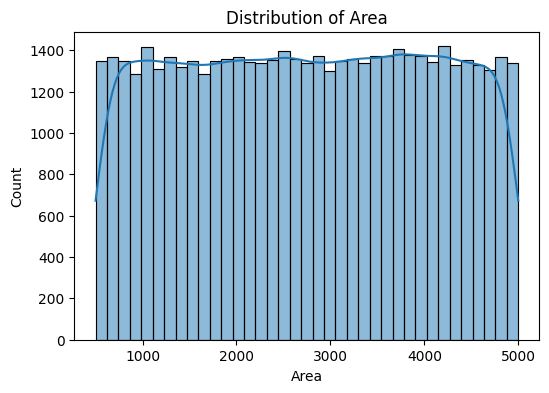

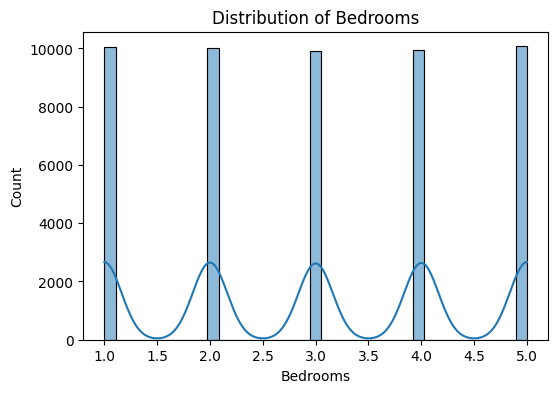

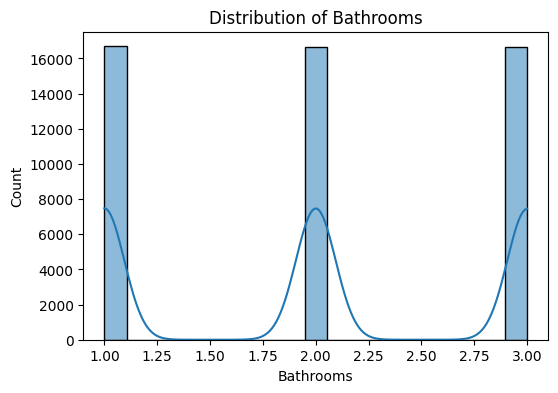

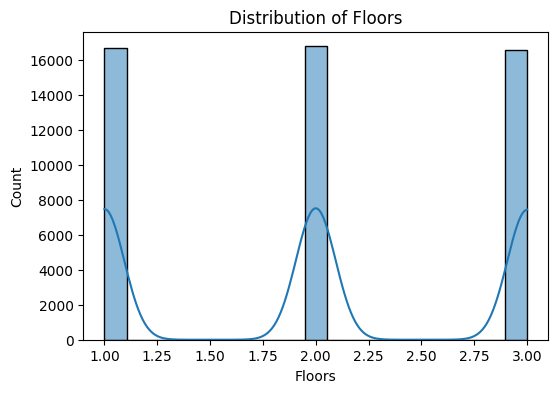

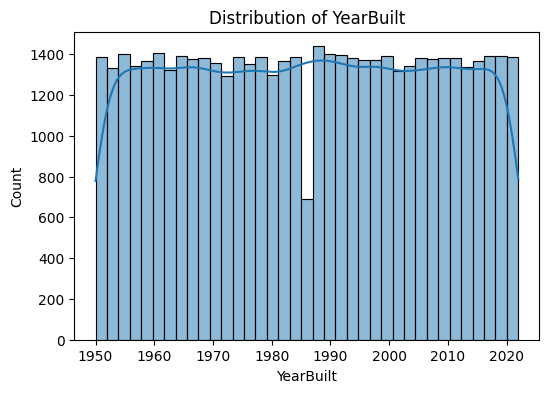

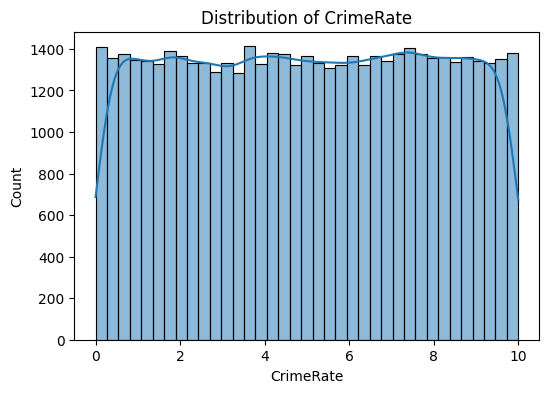

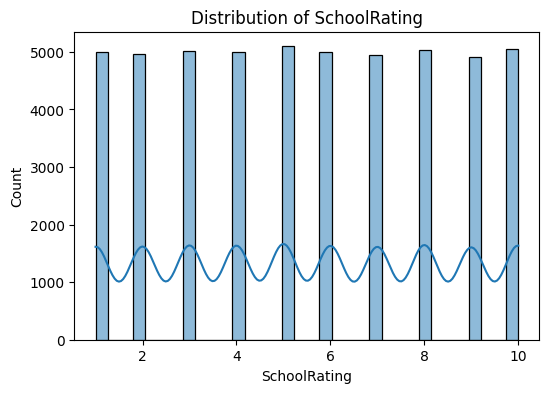

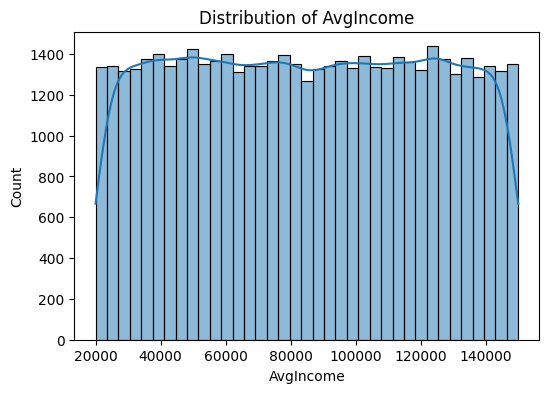

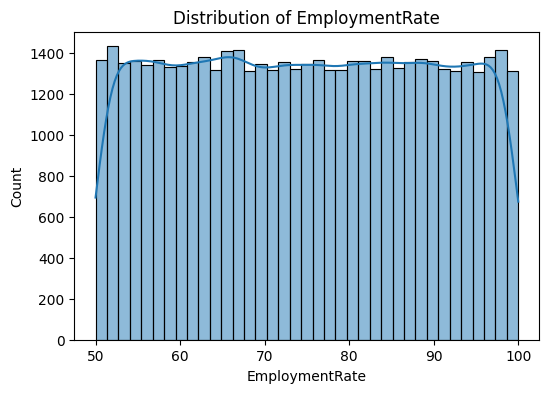

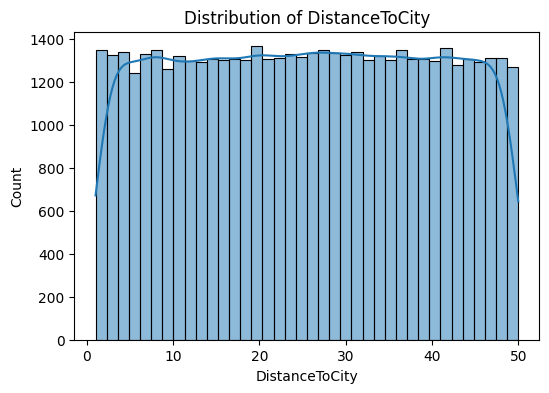

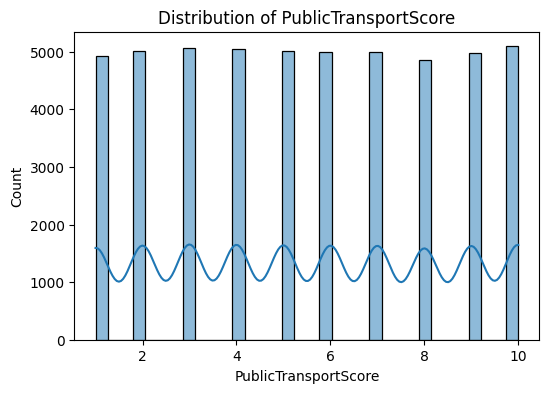

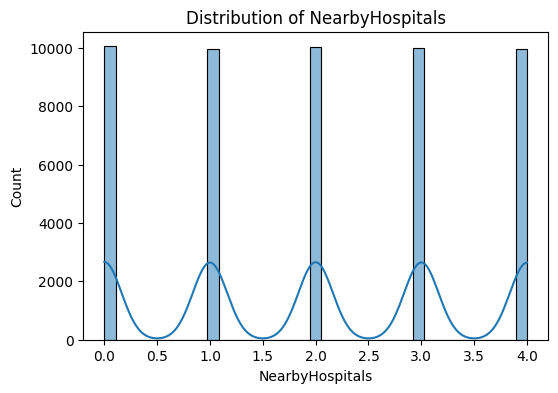

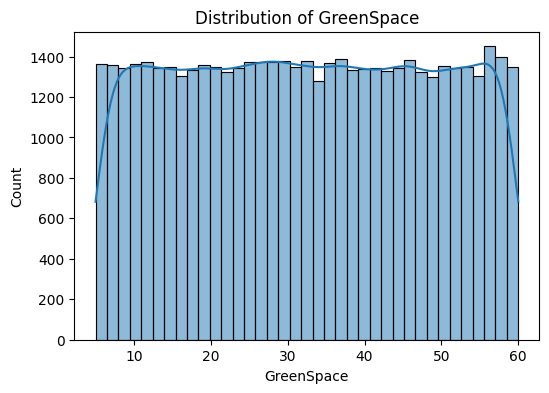

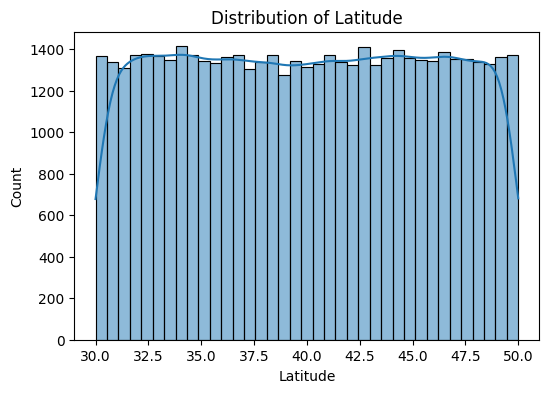

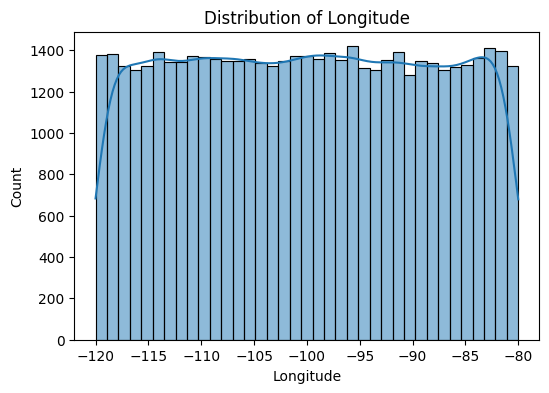

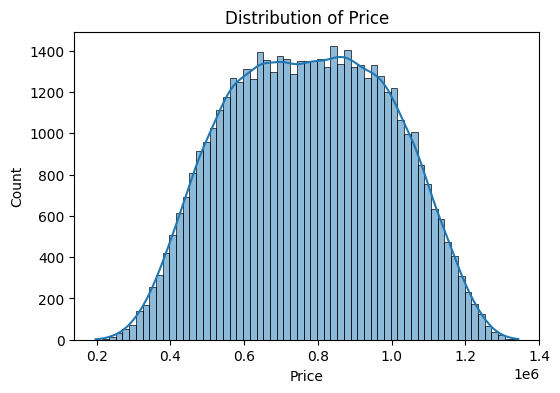

In [34]:
for column in df.columns:
  plt.figure(figsize=(6,4))
  sns.histplot(df[column],kde=True)
  plt.title(f'Distribution of {column}')
  plt.show()

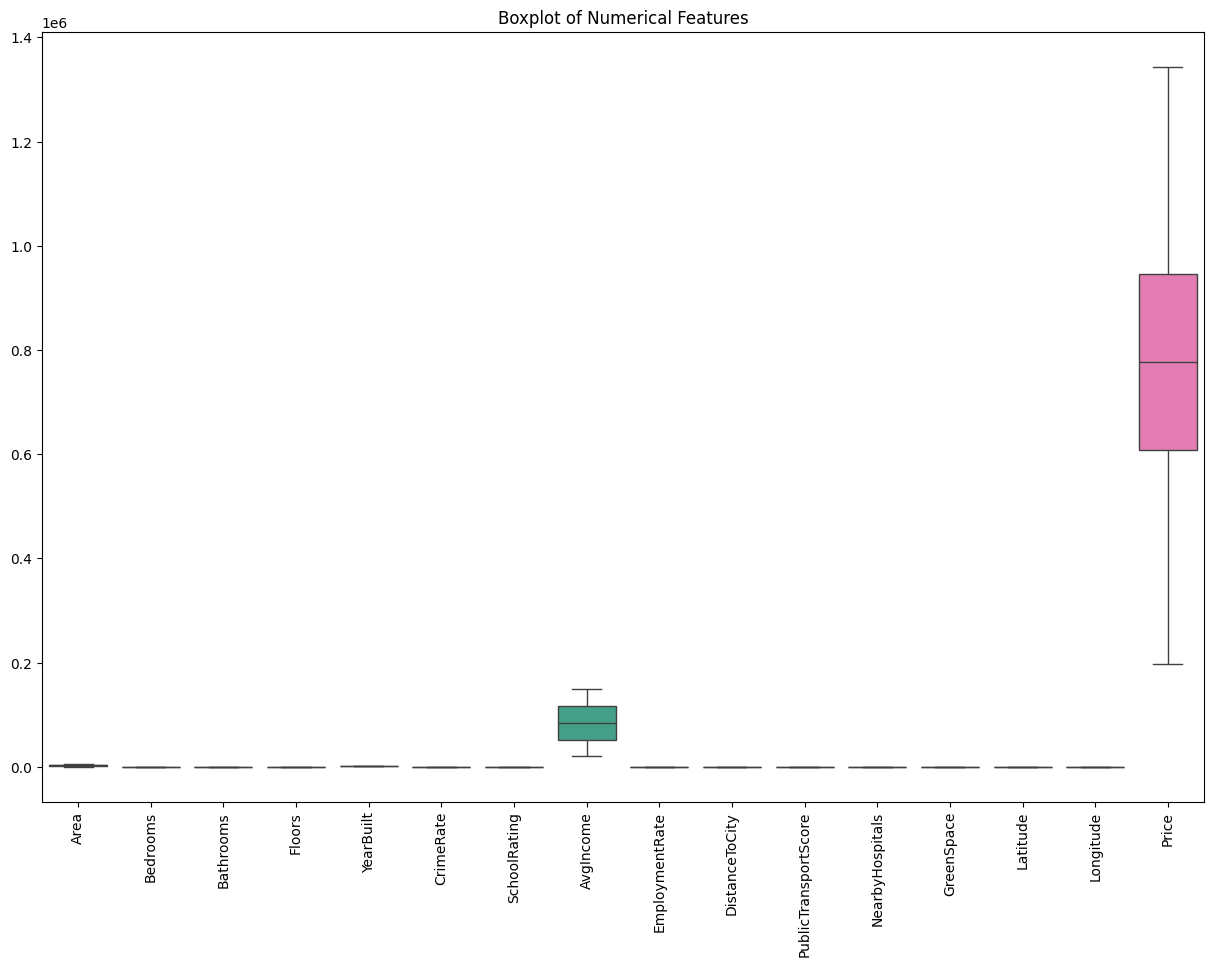

In [35]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

In [36]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 -q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[~((df > upper_bound) | (df < lower_bound)).any(axis=1)]

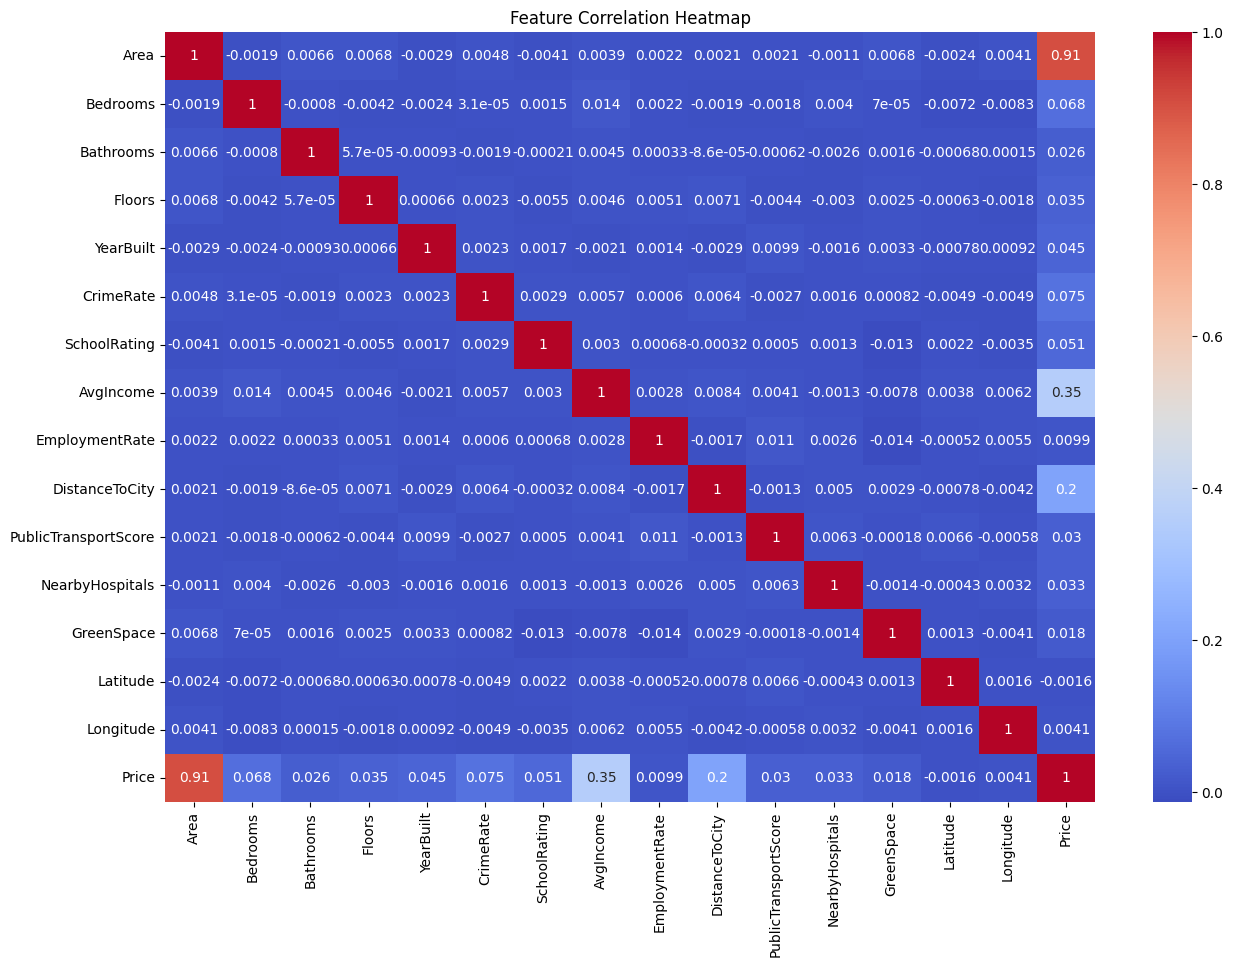

In [37]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [38]:
x = df.drop('Price',axis=1)
y = df['Price']

In [39]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [52]:
x = pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,CrimeRate,SchoolRating,AvgIncome,EmploymentRate,DistanceToCity,PublicTransportScore,NearbyHospitals,GreenSpace,Latitude,Longitude
0,-1.073882,1.411212,1.226498,0.002183,-0.903920,1.465693,-0.871074,-0.714502,-0.457059,-1.561807,-1.56728,1.416282,1.120881,1.367615,-0.327024
1,1.171065,-1.410591,1.226498,1.228742,0.614133,-0.903550,0.870628,0.508860,1.435371,-1.249391,-0.17452,-0.704663,-0.918557,-0.810779,-0.494748
2,0.646833,1.411212,1.226498,1.228742,1.515477,0.089111,-1.567754,0.171094,-1.289230,0.044902,-0.87090,0.709300,1.079376,-0.155910,0.538643
3,-1.377629,0.705761,1.226498,0.002183,-0.192333,-0.951972,-0.174393,-1.403747,-0.945717,0.161084,1.21824,0.002319,-0.816679,-0.019820,1.331931
4,1.675253,-1.410591,1.226498,0.002183,0.898768,-0.682190,-0.871074,-1.703691,-0.735601,1.232224,1.56643,0.002319,-0.521737,-0.554371,1.559481


In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
cv = KFold(n_splits=5,shuffle=True,random_state=42)
models = {'LinearRegression' : LinearRegression(), 'RandomForestRegressor' :
        RandomForestRegressor(n_estimators=100,random_state=42), 'XGBRegressor' :
          XGBRegressor(n_estimators=100,random_state=42)}

for model_name, model in models.items():
  scores = cross_val_score(model,x_train,y_train,cv=cv,scoring='r2')
  print(f'{model_name} Cross Validation Scores : {scores}')
  print(f'{model_name} Cross Validation Mean Score : {np.mean(scores)}')
  print('-' * 50)

LinearRegression Cross Validation Scores : [1. 1. 1. 1. 1.]
LinearRegression Cross Validation Mean Score : 1.0
--------------------------------------------------
RandomForestRegressor Cross Validation Scores : [0.99074811 0.99119762 0.99093312 0.99051865 0.99100659]
RandomForestRegressor Cross Validation Mean Score : 0.9908808158898108
--------------------------------------------------
XGBRegressor Cross Validation Scores : [0.99740216 0.99745962 0.99729439 0.99748745 0.99739604]
XGBRegressor Cross Validation Mean Score : 0.9974079330793074
--------------------------------------------------


In [43]:
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

lr.fit(x_train, y_train)
rf.fit(x_train, y_train)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [44]:
y_pred_lr = lr.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_xgb = xgb.predict(x_test)

In [45]:
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print("-" * 50)

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

Linear Regression Performance:
R² Score: 1.0000
RMSE: 0.00
MAE: 0.00
--------------------------------------------------
Random Forest Performance:
R² Score: 0.9916
RMSE: 390971407.47
MAE: 15849.00
--------------------------------------------------
XGBoost Performance:
R² Score: 0.9985
RMSE: 71360830.51
MAE: 6667.23
--------------------------------------------------


In [47]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [6, 9],
    'min_samples_split': [2, 5]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42),
                              param_grid_rf, cv=3, scoring="r2", verbose=1, n_jobs=-1)

grid_search_rf.fit(x_train, y_train)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

best_rf = RandomForestRegressor(**grid_search_rf.best_params_, random_state=42)
best_rf.fit(x_train, y_train)

y_pred_best_rf = best_rf.predict(x_test)
evaluate_model(y_test, y_pred_best_rf, "Tuned Random Forest")


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters for Random Forest: {'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest Performance:
R² Score: 0.9826
RMSE: 807185492.09
MAE: 22830.13
--------------------------------------------------


In [48]:
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [4, 6],
    'subsample': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(XGBRegressor(random_state=42),
                               param_grid_xgb, cv=3, scoring="r2", verbose=1, n_jobs=-1)

grid_search_xgb.fit(x_train, y_train)

print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = XGBRegressor(**grid_search_xgb.best_params_, random_state=42)
best_xgb.fit(x_train, y_train)

y_pred_best_xgb = best_xgb.predict(x_test)
evaluate_model(y_test, y_pred_best_xgb, "Tuned XGBoost")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Tuned XGBoost Performance:
R² Score: 0.9988
RMSE: 56716756.33
MAE: 5968.93
--------------------------------------------------


In [53]:
best_model = best_xgb if r2_score(y_test, y_pred_best_xgb) > r2_score(y_test, y_pred_best_rf) else best_rf
joblib.dump(best_model, "best_housing_price_model.pkl")

print("Best model saved successfully!")

Best model saved successfully!
